## Creating samples -- How it works

**We will make two segments.**

List of the rappers we will put into the expirment and then a dataframe with the information that we need (artist, text).First step is to pick four random rappers and then to extract those out of the dataframe and then name the file and drop it off into the folder.

We can repeat it over and over to create samples. This notebook can easily be modiified to do other expirments. The variables in cell three n_rappers and n_exp  

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import random
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text

**Bring in the file to create the extraction list**

In [2]:
#read in the csv, yes the df is right their but I want to make sure nothing funky happens 
pre_df=pd.read_csv('./assets/NLP_full.csv')
#toss it around
pre_df = shuffle(pre_df)
rappers=pre_df['artist'].unique()
rappers=list(rappers.flatten())
#pushes it to numpy array and then a flat list with tuples

**Selecting n random artists out of the dataset and making sure they are unique n number of times**

In [3]:
#select the random n targets 
n_rappers=4
n_exp=1
#this will execute the combinations we want just one at time which yes is counter-intutive since later will be running
#the script 300 times to create unique test sets
ps_comb = combinations(rappers, n_rappers) 
ps_targets=[i for i in list(ps_comb)]
ps_targets_indf=(random.sample(ps_targets, n_exp))
#now stick it in a dataframe
ps_df = pd.DataFrame(ps_targets_indf, columns =['first','second','third','fourth'])
spacer=", "
ps_df['artist_selection']=(ps_df['first']+spacer+ps_df['second']+spacer+ps_df['third']+spacer+ps_df['fourth'])

**Check out what we have**

In [5]:
ps_df.head()

,first,second,third,fourth,artist_selection
0,Eminem,J Cole,Big L,missyelliott,"Eminem, J Cole, Big L, missyelliott"


**flatten np arrays into lists --(function had weird results) kept it simple by doing it manually so we have no surprises** 

In [6]:
one=ps_df['first'].unique()
one=list(one.flatten())
two=ps_df['second'].unique()
two=list(two.flatten())
three=ps_df['third'].unique()
three=list(three.flatten())
four=ps_df['fourth'].unique()
four=list(four.flatten())

**make sure we have a unique list by making it a set**

In [7]:
checks=(set(one+two+three+four))
checks=list(checks)
checks

['Big L', 'missyelliott', 'J Cole', 'Eminem']

**now lets remove our targets out of the list and prep the drop list for the dataframe we are going to bring in. quick visual confirmation says they are gone. below we will run a test to confirm that via python.**

In [8]:
#This script gives me the difference between my two lists and provides simple list of artists to drop
#https://www.geeksforgeeks.org/python-difference-two-lists/

def diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))
checks_out=diff(checks,rappers)

In [9]:
print(checks_out)

['Tyler The Creator', 'NF', 'Talib Kweli', '2pac', 'Chance The Rapper', 'Action Bronson', 'CunninLynguists', 'Deniro Farrar', 'Ice Cube', 'the notorious big', 'André 3000', 'Isaiah Rashad', 'Earl Sweatshirt', 'Drake', 'Bas', 'Common', 'Nas', 'Kendrick Lamar', 'Jay-z', 'Royce Da 59', 'Lil Wayne', 'A$AP Ant', 'A$AP Rocky', 'Lupe Fiasco', 'Childish Gambino', 'dmx', 'Joey Bada', 'Mac Miller', 'Logic', 'Montana of 300', 'Eazy-E', 'Pusha-T', 'cardib', 'Kanye West', 'Scarface', 'Immortal Technique']


**Time to bring in the same dataframe and prep it.**

In [10]:
sel_df=pd.read_csv('./assets/NLP_full.csv')
sel_columns=sel_df.columns
sel_columns
# get a visual on the columns

Index(['artist', 'text', 'length', 'number_words', 'expl_bool', 'total_expl',
       'grp_1', 'grp_2', 'tb_polarity', 'tb_subjectivity', 'vader_neg',
       'vader_neu', 'vader_pos', 'compound'],
      dtype='object')

In [11]:
sel_df.drop(columns=['length','expl_bool', 'total_expl',
       'grp_1', 'grp_2', 'tb_polarity', 'tb_subjectivity', 'vader_neg',
       'vader_neu', 'vader_pos', 'compound'],inplace=True)
sel_df.head()
# confirm drop

,artist,text,number_words
0,A$AP Ant,Triple beam for the weight,5
1,A$AP Ant,Cut the middle man tryna get white bitches,8
2,A$AP Ant,Snorting off the plate coke from Colombia,7
3,A$AP Ant,Riding round in the Benz looking like a trap star,10
4,A$AP Ant,Flipping raw day and night,5


**Looking at what we are going to drop**

In [12]:
for each in checks_out:
    sel_df.drop(sel_df[sel_df.artist==each].index, inplace=True)
sel_df.sample(5)

,artist,text,number_words
56734,J Cole,Has been a little burnt out were tired,8
12113,Big L,Blue and whites ride by and niggas yell Fuck ...,11
54896,J Cole,In fact I just might need two cause niggas say...,13
44170,Eminem,Dont I give you enough of my time,8
11502,Big L,I rob for meat If I dont steal I dont eat,11


**Confirming with python that our current data from matchs the check above:**

If the output on the second cell says "True" then we are good to go.

In [13]:
trip_check=sel_df.artist.unique()
trip_check=list(trip_check.flatten())
#when you triple check something it means you really don't want to screw up lol

In [14]:
print(f'are we good to move on? {set(checks)==set(trip_check)}')

are we good to move on? True


**Use the artists to make a unique name for the file**

In [15]:
name_file=str(sel_df.artist.unique().flatten())

In [16]:
name_file=''.join(each for each in name_file if each.isalnum())
name_file

'BigLEminemJColemissyelliott'

In [17]:
name_file=name_file +'.csv'
name_file="./data/"+name_file

In [18]:
sel_df.drop(columns='number_words')

,artist,text
9862,Big L,Yo I got slugs for snitches no love for bitches
9863,Big L,Puttin thugs in ditches when my trigger finger...
9864,Big L,I got a rep that make police jet known to get ...
9865,Big L,I never beg for pussy like Keith Sweat
9866,Big L,Bitches get fucked on the roof when I aint got...
...,...,...
125214,missyelliott,im so faded no exaggeration what backs brea...
125215,missyelliott,shorty what the dance that you doing is dumb ...
125216,missyelliott,i come into this bitch like liquid drip drip ...
125217,missyelliott,im like kak a rak a rak rak a rak a rak make ...


In [6]:
sel_df.to_csv(name_file)
#I always forget to get rid of the index 

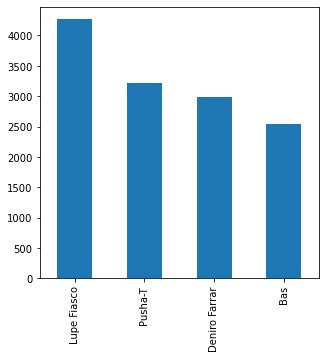

In [3]:
sel_df.artist.value_counts().plot(kind='bar',figsize=(5, 5), label="nulls");

We will now turn it into a PY file and then run it a few hundred times. The PY file version of this notebook will be very much like this.

## Becareful with this code it will literary run your script 300 times.

In [17]:
for x in range(0, 100):
    %run -i "create_target.py"

In [18]:
print('run again')

run again
